In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1234)

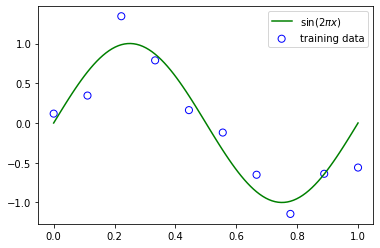

In [2]:

def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

1. sample thêm 10 điểm dữ liệu cho tập valdiation
2. fit 3 model đa thức (bậc 1, bậc 3, bậc 9) cho dữ liệu trên, đánh giá mức độ underfitting, overfitting của 3 model và tính loss train/val.

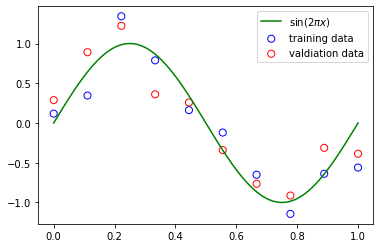

In [3]:
x_val, y_val = create_toy_data(func, 10, 0.25)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="valdiation data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

Fit 3 model đa thức (bậc 1, bậc 3, bậc 9) cho dữ liệu trên, đánh giá mức độ underfitting, overfitting của 3 model và tính loss train/val.

In [4]:
def mse(y, y_pred):

    return np.sum(np.square(y - y_pred))

In [5]:
def pre_process(x,num):
  x_new = np.ones((x.shape[0], 1)).reshape(-1,1)
  x = x.reshape(-1,1)
  for i in range(1,num+1):
    x_new = np.hstack((x_new, x**i))
  return x_new

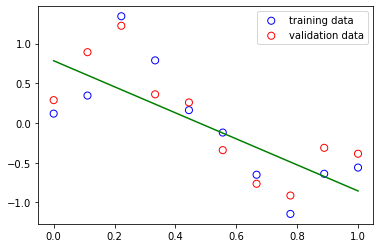

In [6]:
#Bậc 1
X_train_1 = np.column_stack((np.ones((x_val.shape[0],1)),x_train))
w = np.dot(np.linalg.inv(np.dot(np.transpose(X_train_1),X_train_1)), np.dot(np.transpose(X_train_1),y_train))
x_test = np.linspace(0, 1, 100)
X_test = pre_process(x_test, 1)
predict = np.dot(X_test,w)

plt.plot(x_test, predict, 'g')
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.legend()
plt.show()

In [7]:
y_pred = np.dot(X_train_1,w)
loss_1 = mse(y_train,y_pred)
pred_val_1 = np.dot(pre_process(x_val,1),w)
loss_val_1 = mse(y_val,pred_val_1)
print('Loss in training set: {}'.format(loss_1))
print('Loss in validation set: {}'.format(loss_val_1))

Loss in training set: 2.3077661663788356
Loss in validation set: 1.8132877322593322


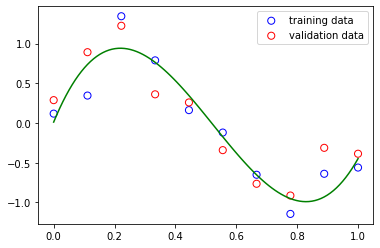

In [8]:
#Bậc 3
X_train_3 = pre_process(x_train, 3)
w = np.dot(np.linalg.inv(np.dot(np.transpose(X_train_3),X_train_3)), np.dot(np.transpose(X_train_3),y_train))
x_test = np.linspace(0, 1, 100)
X_test = pre_process(x_test, 3)
predict = np.dot(X_test,w)

plt.plot(x_test, predict, 'g')
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.legend()
plt.show()

In [9]:
y_pred_3 = np.dot(X_train_3,w)
loss_3 = mse(y_train,y_pred_3)
pred_val_3 = np.dot(pre_process(x_val,3),w)
loss_val_3 = mse(y_val,pred_val_3)
print('Loss in training set: {}'.format(loss_3))
print('Loss in validation set: {}'.format(loss_val_3))

Loss in training set: 0.4982387306784293
Loss in validation set: 0.7772268092527769


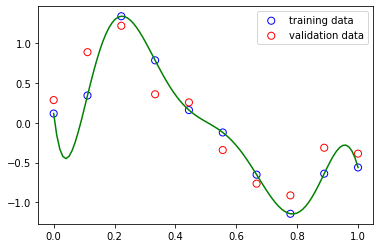

In [10]:
#Bậc 9 
X_train_9 = pre_process(x_train, 9)
w = np.dot(np.linalg.inv(np.dot(np.transpose(X_train_9),X_train_9)), np.dot(np.transpose(X_train_9),y_train))
x_test = np.linspace(0, 1, 100)
X_test = pre_process(x_test, 9)
predict = np.dot(X_test,w)

plt.plot(x_test, predict, 'g')
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.legend()
plt.show()

Thêm 100 dữ liệu vào tập train, model bậc 9 có còn overfitting.

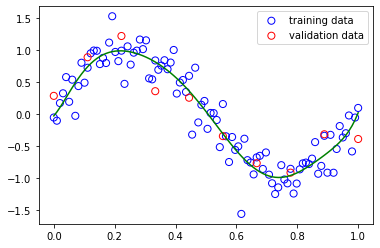

In [11]:
x_train_, y_train_ = create_toy_data(func, 100, 0.25)

X_train_9 = pre_process(x_train_, 9)
w = np.dot(np.linalg.inv(np.dot(np.transpose(X_train_9),X_train_9)), np.dot(np.transpose(X_train_9),y_train_))
x_test = np.linspace(0, 1, 100)
X_test = pre_process(x_test, 9)
predict = np.dot(X_test,w)

plt.plot(x_test, predict, 'g')
plt.scatter(x_train_, y_train_, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.legend()
plt.show()

In [12]:
y_pred_9 = np.dot(X_train_9,w)
loss_9 = mse(y_train_,y_pred_9)
pred_val_9 = np.dot(pre_process(x_val,9),w)
loss_val_9 = mse(y_val,pred_val_9)
print('Loss in training set: {}'.format(loss_9))
print('Loss in validation set: {}'.format(loss_val_9))

Loss in training set: 5.530427986866907
Loss in validation set: 0.6824000783328542


Chỉ dùng 10 dữ liệu cho tập train, fil model bậc 9 và dùng rigde regression để giảm overfitting

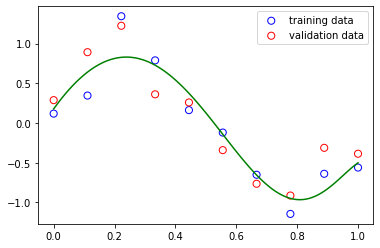

In [13]:
alpha = 0.001
X_train_9 = pre_process(x_train, 9)
w = np.dot(np.linalg.inv(np.dot(np.transpose(X_train_9),X_train_9)+ alpha*np.identity(x_train.shape[0])), np.dot(np.transpose(X_train_9),y_train))
x_test = np.linspace(0, 1, 100)
X_test = pre_process(x_test, 9)
predict = np.dot(X_test,w)

plt.plot(x_test, predict, 'g')
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.legend()
plt.show()

In [14]:
y_pred_9 = np.dot(X_train_9,w)
loss_9 = mse(y_train,y_pred_9)
pred_val_9 = np.dot(pre_process(x_val,9),w)
loss_val_9 = mse(y_val,pred_val_9)
print('Loss in training set: {}'.format(loss_9))
print('Loss in validation set: {}'.format(loss_val_9))

Loss in training set: 0.49630083393277186
Loss in validation set: 0.7438592519993319
